# Домашнее задание к лекции «Корреляция и корреляционный анализ»

Возьмите датасет Mortality and Water Hardness**
https://www.kaggle.com/ukveteran/mortality-and-water-hardness

В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

**Задание 1.**
Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

* Построить точечный график
* Рассчитать коэффициенты корреляции Пирсона и Спирмена
* Построить модель линейной регрессии
* Рассчитать коэффициент детерминации
* Вывести график остатков

**Задание 2.**
Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

* Разделить данные на 2 группы
* Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [15, 10]
plt.rcParams.update({'font.size': 14})
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [2]:
df = pd.read_csv('water.csv', usecols=['location', 'town', 'mortality', 'hardness'])
df.head(5)

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   location   61 non-null     object
 1   town       61 non-null     object
 2   mortality  61 non-null     int64 
 3   hardness   61 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.0+ KB


In [4]:
df.columns

Index(['location', 'town', 'mortality', 'hardness'], dtype='object')

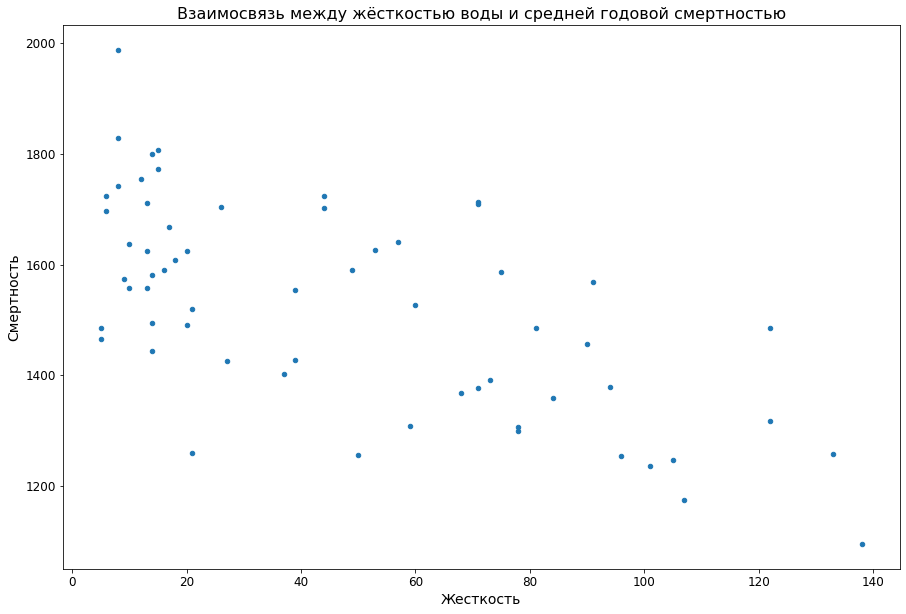

In [5]:
# визуализируем взаимосвязь между жёсткостью воды и средней годовой смертностью
ax = df.plot(kind='scatter', x='hardness', y='mortality', \
        title = 'Взаимосвязь между жёсткостью воды и средней годовой смертностью', \
       xlabel = 'Жесткость', ylabel = 'Смертность',\
       fontsize = 12)
ax.title.set_size(16)
plt.show()

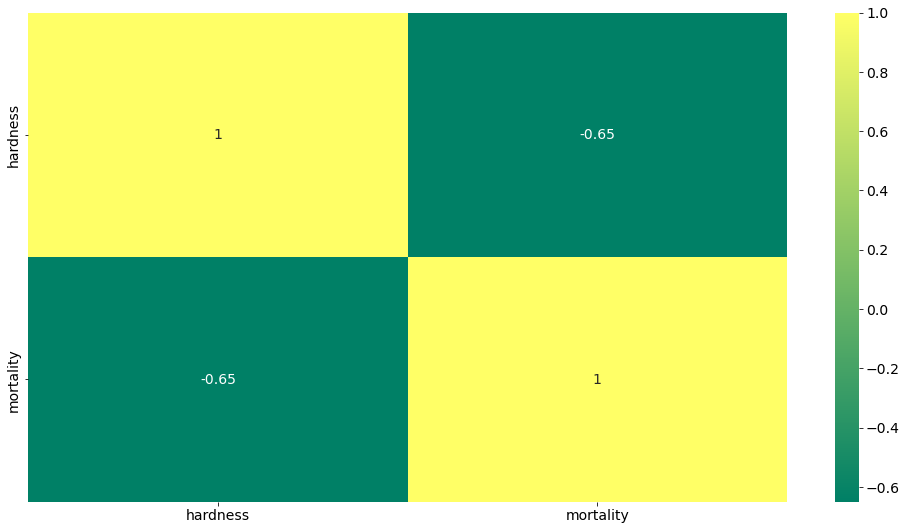

In [6]:
#Строим матрицу корреляции и считаем коэф. корреляции Пирсона
fig,ax=plt.subplots(figsize=(17, 9))
sns.heatmap(data=df[['hardness', 'mortality']].corr().round(2),annot=True,cmap="summer")
plt.show()

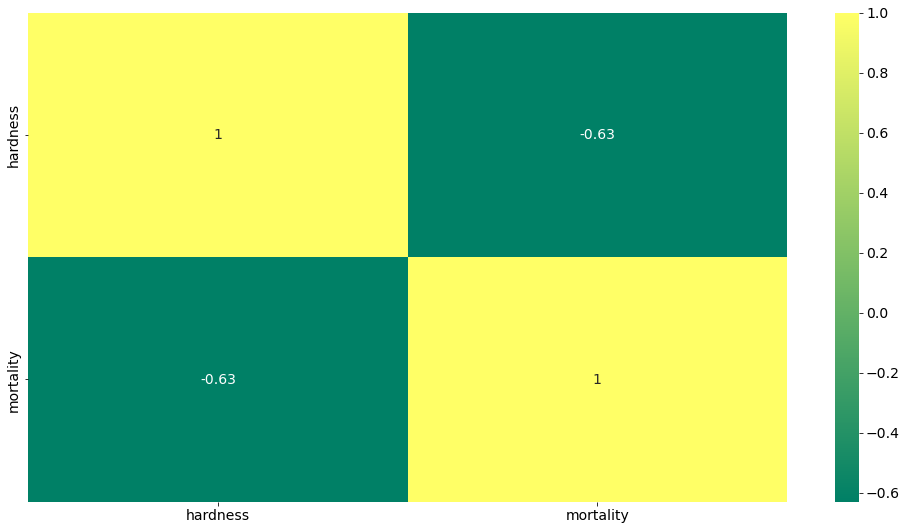

In [7]:
#Строим матрицу корреляции и считаем коэф. корреляции Спирмана
fig,ax=plt.subplots(figsize=(17, 9))
sns.heatmap(data=df[['hardness', 'mortality']].corr(method='spearman').round(2),annot=True,cmap="summer")
plt.show()

# Линейная регрессия

In [8]:
X = df[['hardness']]
y = df['mortality']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [10]:
X_train.shape

(42, 1)

In [11]:
X_test.shape

(19, 1)

In [12]:
y_train.shape

(42,)

In [13]:
y_test.shape

(19,)

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [15]:
print(model.coef_)
print(model.intercept_)

[-3.13167087]
1668.9722977277095


In [16]:
y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [17]:
y_test

0     1247
5     1558
46    1495
31    1702
13    1307
55    1625
34    1259
49    1587
12    1519
40    1696
33    1309
59    1485
16    1555
3     1800
53    1709
17    1428
8     1637
6     1807
41    1236
Name: mortality, dtype: int64

In [18]:
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации

0.5046490611017092

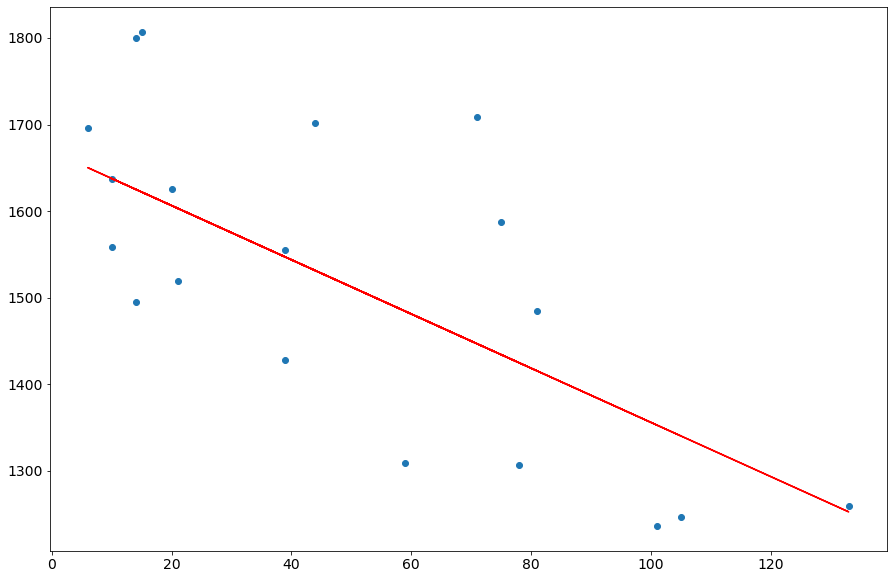

In [19]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [20]:
#Остатки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [21]:
X_const = sm.add_constant(X_train) # техническая особенность библиотеки, надо руками добавить константу

/Users/mikhailsemenov/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [22]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     26.31
Date:                Fri, 05 May 2023   Prob (F-statistic):           7.83e-06
Time:                        14:03:29   Log-Likelihood:                -269.10
No. Observations:                  42   AIC:                             542.2
Df Residuals:                      40   BIC:                             545.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1668.9723     36.543     45.671      0.0

Text(0, 0.5, 'Остатки')

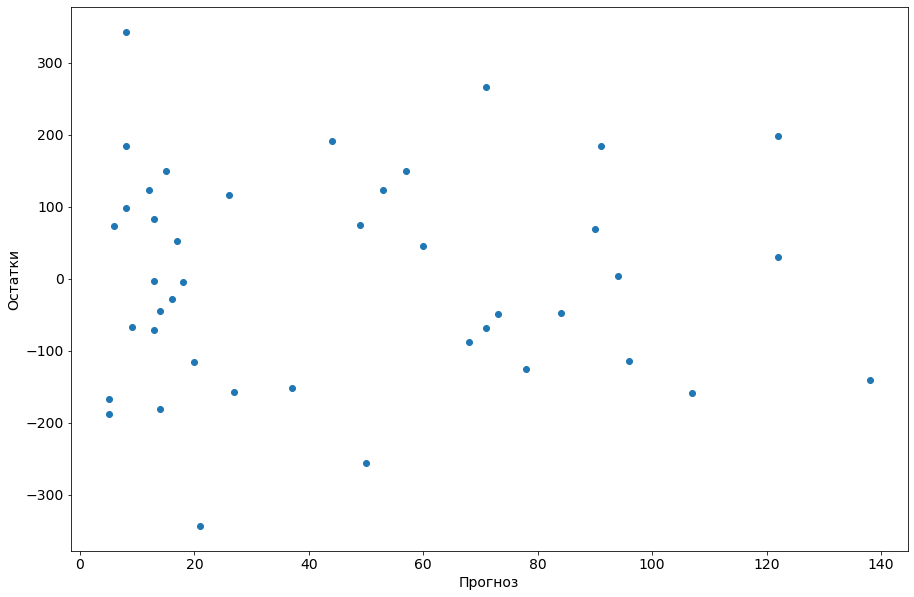

In [23]:
# посмотрим на остатки
plt.scatter(x=X_const.iloc[:, 1], y=results.resid)
plt.xlabel('Прогноз')
plt.ylabel('Остатки')

In [24]:
#Разделить на две группы Север и Юг и повторить анализ для каждой
df_north = df[df['location'] == 'North']
df_south = df[df['location'] == 'South']

# Север

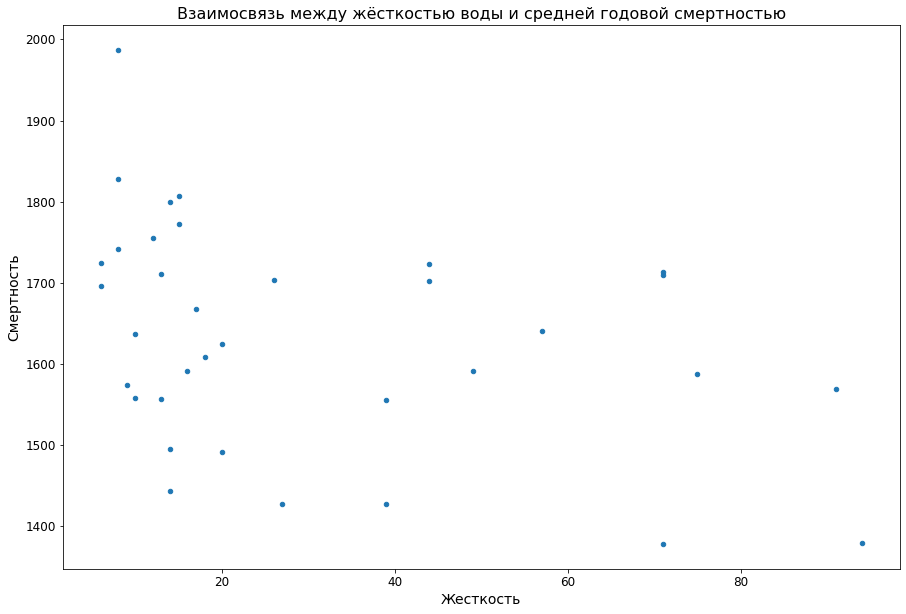

In [25]:
# визуализируем взаимосвязь между жёсткостью воды и средней годовой смертностью
ax = df_north.plot(kind='scatter', x='hardness', y='mortality', \
        title = 'Взаимосвязь между жёсткостью воды и средней годовой смертностью', \
       xlabel = 'Жесткость', ylabel = 'Смертность',\
       fontsize = 12)
ax.title.set_size(16)
plt.show()

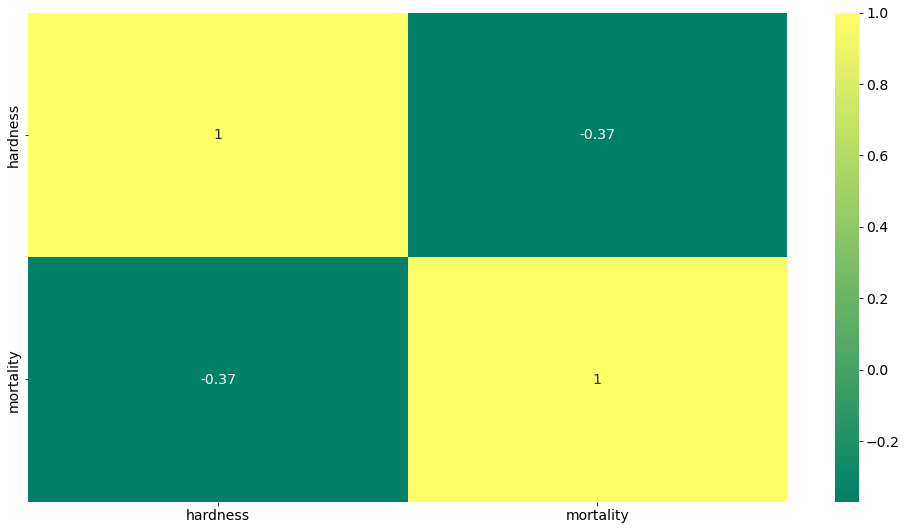

In [26]:
#Строим матрицу корреляции и считаем коэф. корреляции Пирсона
fig,ax=plt.subplots(figsize=(17, 9))
sns.heatmap(data=df_north[['hardness', 'mortality']].corr().round(2),annot=True,cmap="summer")
plt.show()

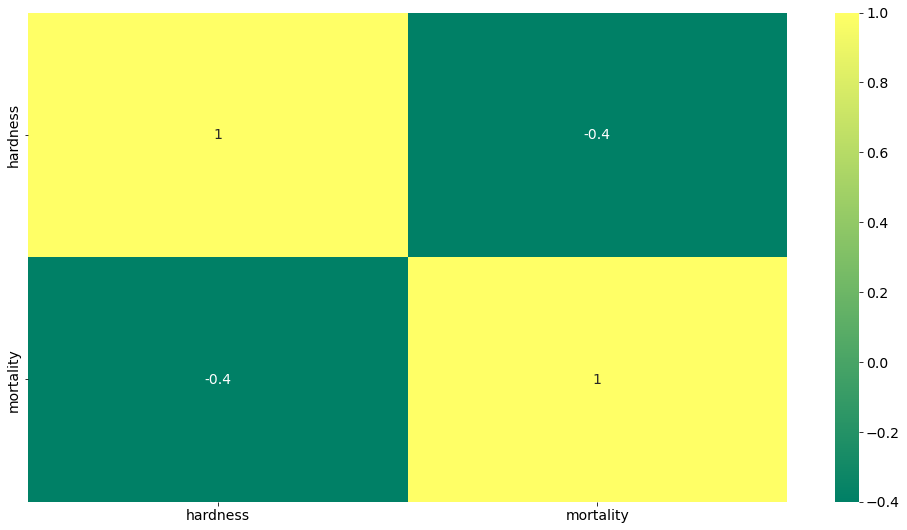

In [27]:
#Строим матрицу корреляции и считаем коэф. корреляции Спирмана
fig,ax=plt.subplots(figsize=(17, 9))
sns.heatmap(data=df_north[['hardness', 'mortality']].corr(method='spearman').round(2),annot=True,cmap="summer")
plt.show()

# Линейная регрессия

In [28]:
X = df_north[['hardness']]
y = df_north['mortality']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [30]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(11,)

In [31]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [32]:
print(model.coef_)
print(model.intercept_)

[-1.97686226]
1688.150229031281


In [33]:
y_pred = model.predict(X_test)
y_pred

array([1672.33533095, 1670.35846869, 1660.47415739, 1676.28905547,
       1656.52043287, 1547.79300857, 1601.16828959, 1672.33533095,
       1611.05260089, 1658.49729513, 1611.05260089])

In [34]:
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации

0.018885304285745863

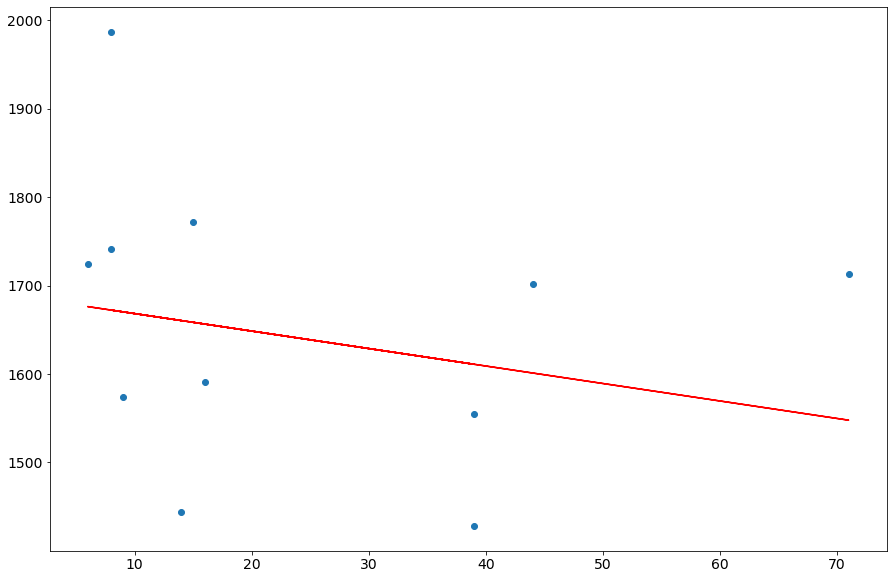

In [35]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [36]:
#Остатки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [37]:
X_const = sm.add_constant(X_train) # техническая особенность библиотеки, надо руками добавить константу

/Users/mikhailsemenov/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [38]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     5.269
Date:                Fri, 05 May 2023   Prob (F-statistic):             0.0316
Time:                        14:03:30   Log-Likelihood:                -147.20
No. Observations:                  24   AIC:                             298.4
Df Residuals:                      22   BIC:                             300.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1688.1502     37.137     45.457      0.0

Text(0, 0.5, 'Остатки')

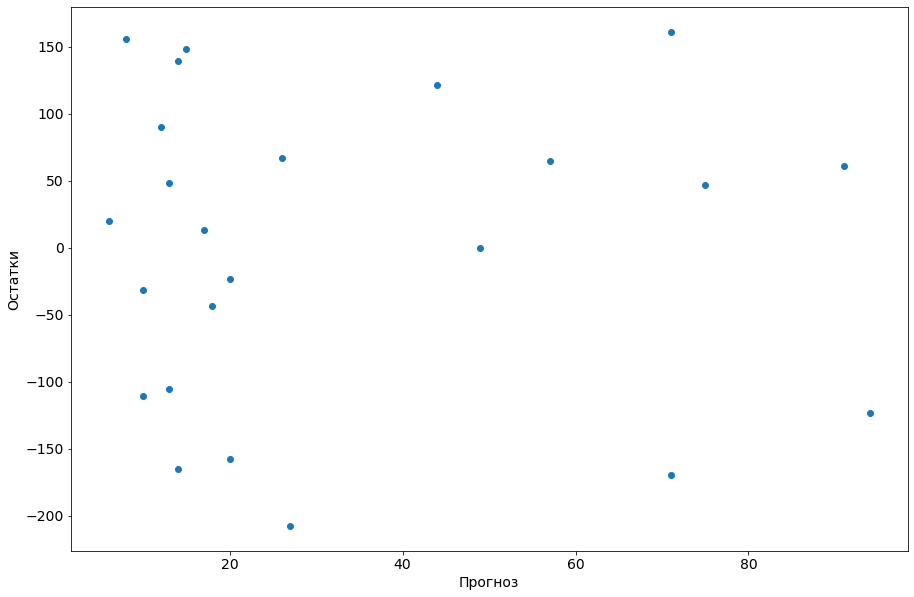

In [39]:
# посмотрим на остатки
plt.scatter(x=X_const.iloc[:, 1], y=results.resid)
plt.xlabel('Прогноз')
plt.ylabel('Остатки')

# Юг

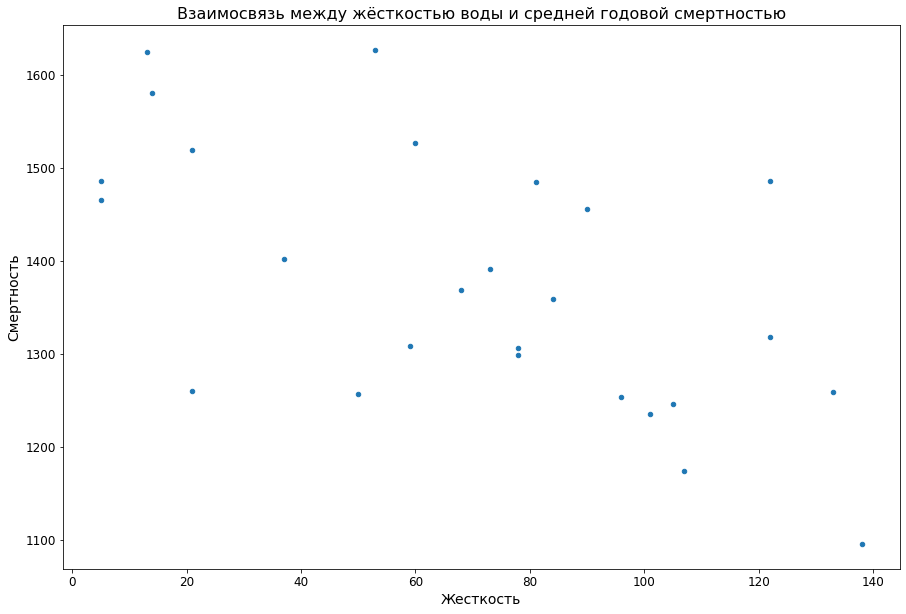

In [40]:
# визуализируем взаимосвязь между жёсткостью воды и средней годовой смертностью
ax = df_south.plot(kind='scatter', x='hardness', y='mortality', \
        title = 'Взаимосвязь между жёсткостью воды и средней годовой смертностью', \
       xlabel = 'Жесткость', ylabel = 'Смертность',\
       fontsize = 12)
ax.title.set_size(16)
plt.show()

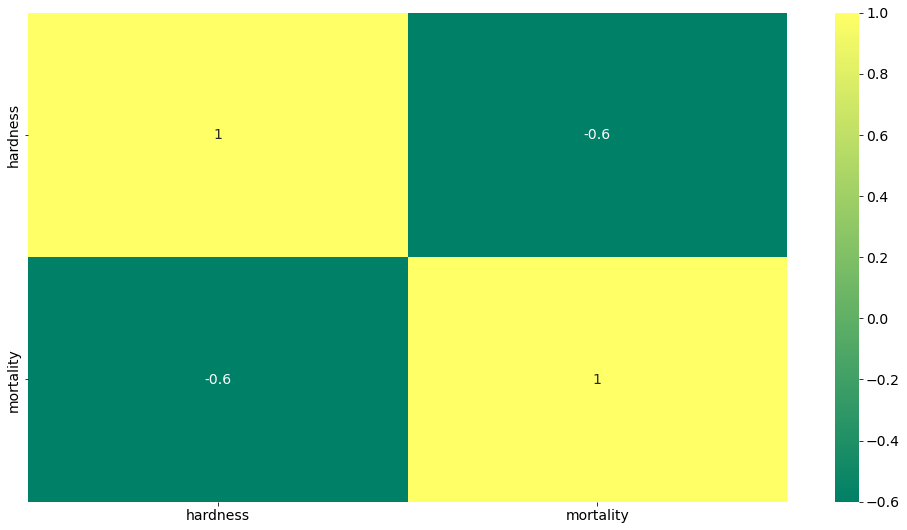

In [41]:
#Строим матрицу корреляции и считаем коэф. корреляции Пирсона
fig,ax=plt.subplots(figsize=(17, 9))
sns.heatmap(data=df_south[['hardness', 'mortality']].corr().round(2),annot=True,cmap="summer")
plt.show()

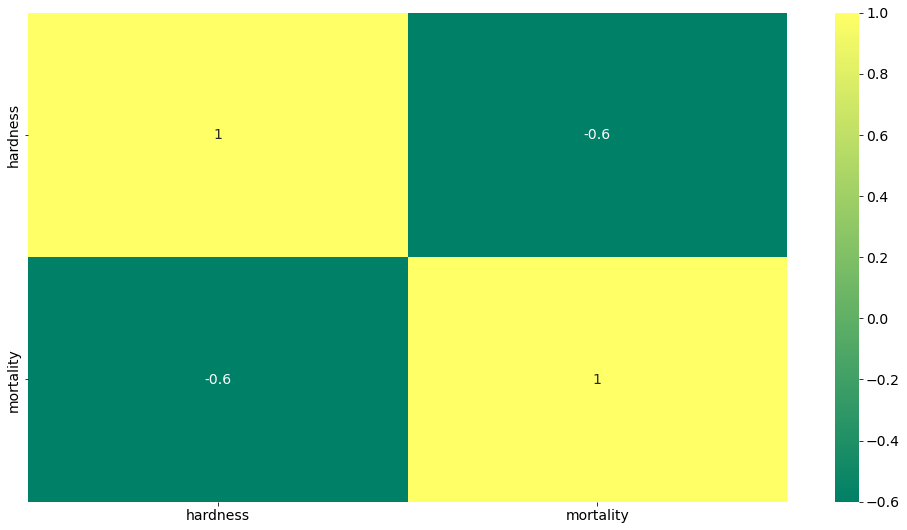

In [42]:
#Строим матрицу корреляции и считаем коэф. корреляции Спирмана
fig,ax=plt.subplots(figsize=(17, 9))
sns.heatmap(data=df_south[['hardness', 'mortality']].corr(method='spearman').round(2),annot=True,cmap="summer")
plt.show()

# Линейная регрессия

In [43]:
X = df_south[['hardness']]
y = df_south['mortality']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [45]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(8,)

In [46]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [47]:
print(model.coef_)
print(model.intercept_)

[-3.51342921]
1640.2204603423374


In [48]:
y_pred = model.predict(X_test)
y_pred

array([1211.58209643, 1622.65331428, 1271.31039304, 1211.58209643,
       1510.22357948, 1566.43844688, 1432.92813681, 1622.65331428])

In [49]:
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации

-2.551922301235205

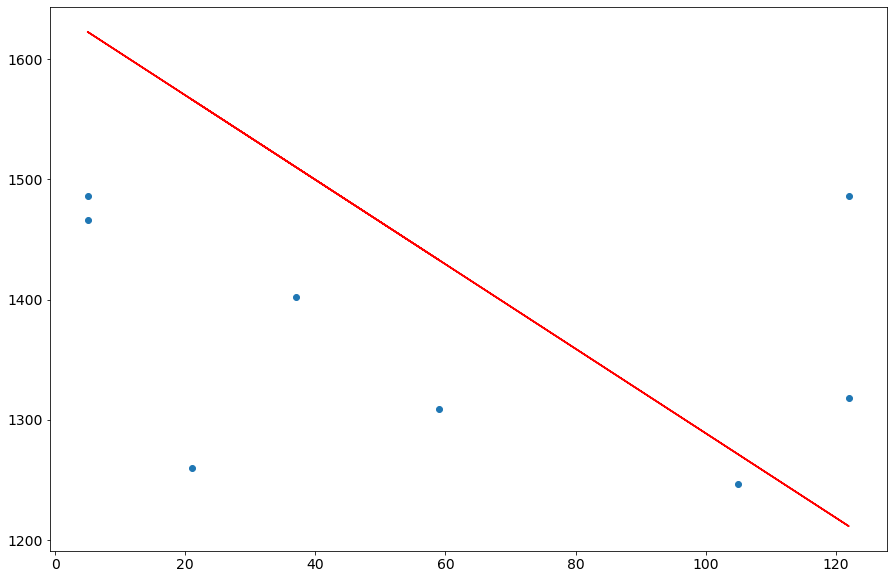

In [50]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [51]:
#Остатки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [52]:
X_const = sm.add_constant(X_train) # техническая особенность библиотеки, надо руками добавить константу

/Users/mikhailsemenov/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [53]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     28.00
Date:                Fri, 05 May 2023   Prob (F-statistic):           7.30e-05
Time:                        14:03:31   Log-Likelihood:                -106.97
No. Observations:                  18   AIC:                             217.9
Df Residuals:                      16   BIC:                             219.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1640.2205     54.471     30.112      0.0

/Users/mikhailsemenov/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Text(0, 0.5, 'Остатки')

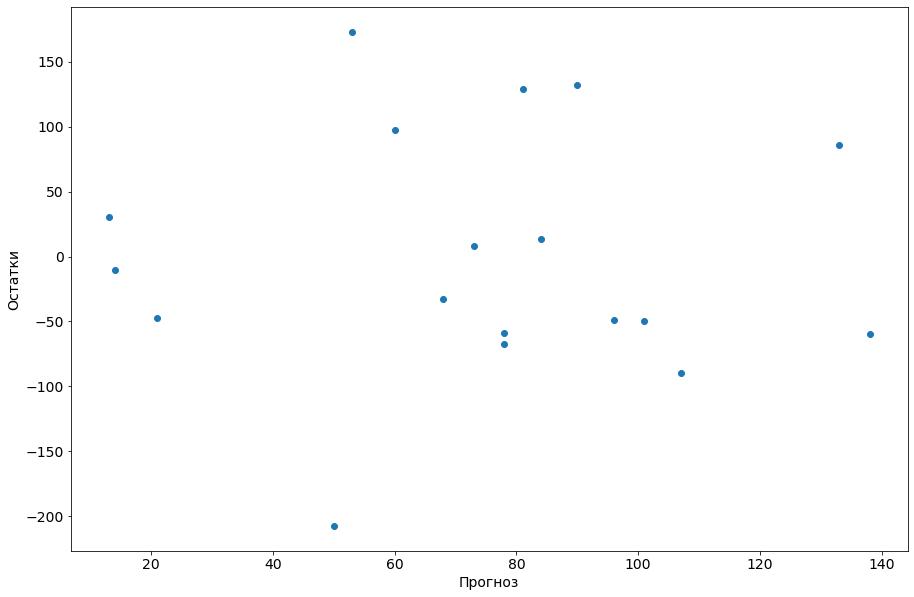

In [54]:
# посмотрим на остатки
plt.scatter(x=X_const.iloc[:, 1], y=results.resid)
plt.xlabel('Прогноз')
plt.ylabel('Остатки')